In [19]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import keras

img_shape = (32, 32, 1)  # img_shape is 32,32 and 32,32,1 is needed for CNN

In [20]:
def get_images(folder):
    return np.array([plt.imread(file).reshape(img_shape) for file in folder.iterdir()])

def get_labels(folder):
    return np.array([int(file.stem.split('_')[-1]) for file in folder.iterdir()]) - 1

def load_data(path):
    return get_images(path), get_labels(path)

In [21]:
train_folder = Path().cwd() / 'DataSet' / 'train'
test_folder = Path().cwd() / 'DataSet' / 'test'

train_images, train_labels = load_data(train_folder)
test_images, test_labels = load_data(test_folder)

In [22]:
n_class = len(np.unique(train_labels))
train_labels = keras.utils.to_categorical(train_labels, num_classes=n_class)
test_labels = keras.utils.to_categorical(test_labels, num_classes=n_class)

In [23]:
# Define and compile the model
model = keras.models.Sequential([
    keras.layers.InputLayer(shape=img_shape),
    keras.layers.Conv2D(32, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(n_class, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and evaluate the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=32)


Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.4544 - loss: 1.8260
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.8522 - loss: 0.4512
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9153 - loss: 0.2446
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9454 - loss: 0.1581
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9663 - loss: 0.1038
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9752 - loss: 0.0749
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9791 - loss: 0.0614
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9843 - loss: 0.0488
Epoch 9/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9867 - loss: 0.0405
Epoch 10/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9869 - loss: 0.0411
Epoch 11/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9915 - loss: 0.0267
Epoch 12/20
420/420 ━━━━━━━━━━

In [24]:
loss, acc = model.evaluate(test_images, test_labels, batch_size=32,verbose=0)
print('Test loss:', loss)
print(f'Test accuracy: {acc:.2%}')

Test loss: 0.41596508026123047
Test accuracy: 91.82%


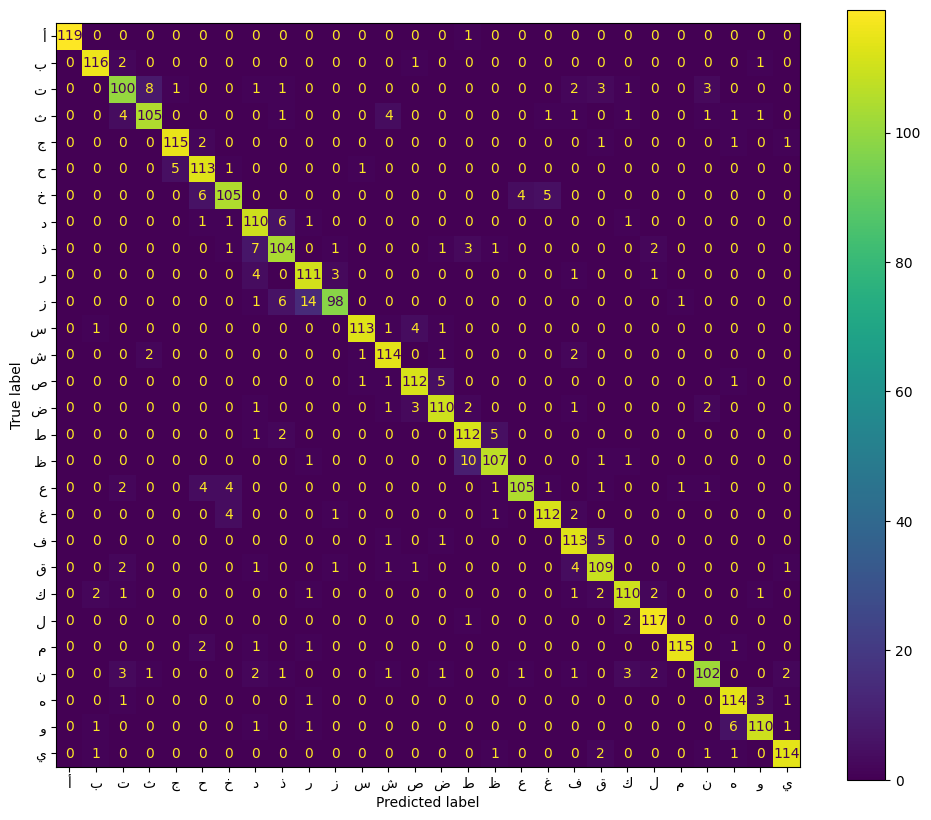

In [25]:
# Make predictions on the test data
predictions = model.predict(test_images,verbose=0)

# Convert the predictions and test labels to one-hot encoded form
arabic_characters = np.array(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي'])
predictions = arabic_characters[np.argmax(predictions, axis=1)]
y_test = arabic_characters[np.argmax(test_labels, axis=1)]

fig, ax = plt.subplots(figsize=(12,10),dpi=100)
# Create and plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions,display_labels=arabic_characters,ax=ax)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           أ       1.00      0.99      1.00       120
           ب       0.96      0.97      0.96       120
           ت       0.87      0.83      0.85       120
           ث       0.91      0.88      0.89       120
           ج       0.95      0.96      0.95       120
           ح       0.88      0.94      0.91       120
           خ       0.91      0.88      0.89       120
           د       0.85      0.92      0.88       120
           ذ       0.86      0.87      0.86       120
           ر       0.85      0.93      0.88       120
           ز       0.94      0.82      0.88       120
           س       0.97      0.94      0.96       120
           ش       0.92      0.95      0.93       120
           ص       0.93      0.93      0.93       120
           ض       0.92      0.92      0.92       120
           ط       0.87      0.93      0.90       120
           ظ       0.92      0.89      0.91       120
           ع       0.95    